In [150]:
# -*- coding: utf-8 -*-
"""
Created on Sat Nov 17 13:21:25 2018
@author: Ken

Modified by MinhKhang Nguyen
July 09 2020 3:04 PM
"""

'\nCreated on Sat Nov 17 13:21:25 2018\n@author: Ken\n\nModified by MinhKhang Nguyen\nJuly 09 2020 3:04 PM\n'

In [1]:
import pandas as pd 
import random as rnd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
gdf = pd.read_csv('regssdatacsv.csv')

In [3]:
gdf.columns

Index(['Row', 'Tm', 'Game', 'Date', 'Home/Away', 'Opp', 'Result', 'TeamPTS',
       'OpponentPTS', 'TeamFG', 'TeamFGA', 'TeamFGP', 'Team3P', 'Team3PA',
       'Team3PP', 'TeamFT', 'TeamFTA', 'TeamFTP', 'OpponentFG', 'OpponentFGA',
       'OpponentFGP', 'Opponent3P', 'Opponent3PA', 'Opponent3PP', 'OpponentFT',
       'OpponentFTA', 'OpponentFTP'],
      dtype='object')

In [4]:
NOPdf = gdf[gdf.Tm == 'NOP']
ORLdf = gdf[gdf.Tm == 'ORL']


In [5]:
NOPdf.Date = NOPdf.Date.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
NOPdf = NOPdf[(NOPdf['Date'] > pd.to_datetime('20191022', format='%Y%m%d', errors='ignore')) & (NOPdf['Date'] <= pd.to_datetime('20200311', format='%Y%m%d', errors='ignore'))]

ORLdf.Date = ORLdf.Date.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
ORLdf = ORLdf[(ORLdf['Date'] > pd.to_datetime('20191022', format='%Y%m%d', errors='ignore'))& (ORLdf['Date'] <= pd.to_datetime('20200311', format='%Y%m%d', errors='ignore'))]


C:\Users\Home\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


TypeError: '>' not supported between instances of 'str' and 'Timestamp'

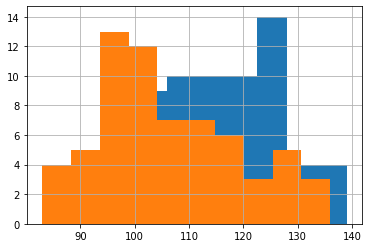

In [6]:
NOPdf.TeamPTS.hist()
ORLdf.TeamPTS.hist()

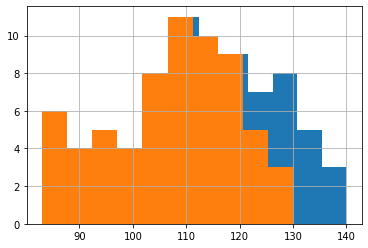

In [7]:
NOPdf.OpponentPTS.hist()
ORLdf.OpponentPTS.hist()

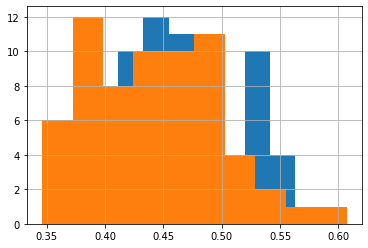

In [8]:
NOPdf.TeamFGP.hist()
ORLdf.TeamFGP.hist()

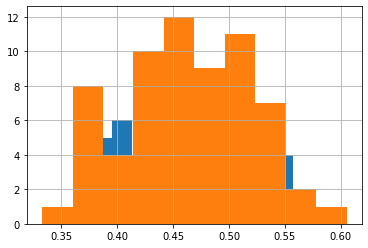

In [9]:
NOPdf.OpponentFGP.hist()
ORLdf.OpponentFGP.hist()

In [10]:
NOPmeanpts = NOPdf.TeamPTS.mean()
ORLmeanpts = ORLdf.TeamPTS.mean()
NOPfgp = NOPdf.TeamFGP.mean()
ORLfgp = ORLdf.TeamFGP.mean()
NOPsdpts = NOPdf.TeamPTS.std()
ORLsdpts = ORLdf.TeamPTS.std()

NOPmeaORLp = NOPdf.OpponentPTS.mean()
ORLmeaORLp = ORLdf.OpponentPTS.mean()
NOPfgpopp = NOPdf.OpponentFGP.mean()
ORLfgpopp = ORLdf.OpponentFGP.mean()
NOPsdopp = NOPdf.OpponentPTS.std()
ORLsdopp = ORLdf.OpponentPTS.std()

print("NOP Mean ", NOPmeanpts)
print("NOP FG% ", NOPfgp)
print("NOP Points Standard Deviation ", NOPsdpts)
print("ORL Points Mean ", ORLmeanpts)
print("ORL FG% ", ORLfgp)
print("ORL Points Standard Deviation ", ORLsdpts)

print("NOP OppPoints Mean ", NOPmeaORLp)
print("NOP OppFG% Mean ", NOPfgpopp)
print("NOP OppPoints SD ", NOPsdopp)
print("ORL OppPoints Mean ", ORLmeaORLp)
print("ORL OppFG% Mean ", ORLfgpopp)
print("ORL OppPoints SD ", ORLsdopp)

NOP Mean  116.1875
NOP FG%  0.463859375
NOP Points Standard Deviation  11.105375503753354
ORL Points Mean  106.36923076923077
ORL FG%  0.4420923076923077
ORL Points Standard Deviation  13.24477400568007
NOP OppPoints Mean  117.015625
NOP OppFG% Mean  0.4664218749999999
NOP OppPoints SD  11.269416665654305
ORL OppPoints Mean  107.33846153846154
ORL OppFG% Mean  0.4631538461538462
ORL OppPoints SD  12.06917163048707


In [11]:
def gameSim():
    NOPScore = (rnd.gauss(NOPmeanpts,NOPsdpts)+ rnd.gauss(ORLmeaORLp,ORLsdopp))/2
    ORLScore = (rnd.gauss(ORLmeanpts,ORLsdpts)+ rnd.gauss(ORLmeaORLp,ORLsdopp))/2
    if int(round(NOPScore)) > int(round(ORLScore)):
        return 1
    elif int(round(NOPScore)) < int(round(ORLScore)):
        return -1
    else: return 0

In [12]:
def gAmesSim(ns):
    gamesout = []
    team1win = 0
    team2win = 0
    for i in range(ns):
        gm = gameSim()
        gamesout.append(gm)
        if gm == 1:
            team1win +=1 
        elif gm == -1:
            team2win +=1
    print('NOP Win ', team1win/(team1win+team2win),'%')
    print('ORL Win ', team2win/(team1win+team2win),'%')
    return gamesout
        

In [13]:
gAmesSim(10000)

NOP Win  0.6620810922631362 %
ORL Win  0.3379189077368639 %


[-1,
 -1,
 -1,
 1,
 1,
 1,
 0,
 1,
 1,
 -1,
 0,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 0,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 0,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 0,
 1,
 -1,
 1,
 0,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 0,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1